In [1]:
import prim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols

In [2]:
inputs = pd.read_csv("../Results_DMU/Murrumbala/scenario_values.csv")

low climate change is lower than current so it's 0 instead of 2

In [4]:
inputs.Climate_change_scenario.replace(2,0,inplace=True)

In [5]:
cost = pd.read_csv("../Results_DMU/Murrumbala/COST_d30_v2.csv")
npv = pd.read_csv("../Results_DMU/Murrumbala/NPV_d30_v2.csv")

In [6]:
reduced_risk = pd.read_csv("../Results_DMU/Murrumbala/BEN_ind_d30_v2.csv",dtype='float64')
avoided_repair = pd.read_csv("../Results_DMU/Murrumbala/BEN_direct_d30_v2.csv",dtype='float64')
ruc_decrease = pd.read_csv("../Results_DMU/Murrumbala/BEN_add_d30_v2.csv",dtype='float64')
isolated_trips = pd.read_csv("../Results_DMU/Murrumbala/BEN_isol_d30_v2.csv",dtype='float64')
maintenance_sav = pd.read_csv("../Results_DMU/Murrumbala/BEN_sav_d30_v2.csv",dtype='float64')

In [248]:
figfolder = "Murrumbala/"

In [122]:
benef = reduced_risk+avoided_repair+ruc_decrease+maintenance_sav

In [8]:
import seaborn as sns
sns.set_context("notebook",rc={"font.size": 18})
sns.set_style("whitegrid")

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [9]:
reduced_risk.sample(3)

,Paving link#1,Paving link#2,Improve drainange all,Gravel link #1 and #2,Gravel alternatives routes
1568,48700000,6910000,14800000,6790000,6790000
1643,94400000,13400000,28600000,13100000,13100000
135,50900000,14900000,15300000,2970000,2970000


In [10]:
def savefig(path, **kwargs):
    #Saves in both png and pdf
    
    plt.tight_layout()
    
    path = path.replace(".png","")
    path = path.replace(".pdf","")

    plt.savefig(path+".png", )
    plt.savefig(path+".pdf", )

In [11]:
new_names = dict({'Paving link#1':'Pave1', 'Paving link#2':'Pave2', 'Improve drainange all':'drainage',
       'Gravel link #1 and #2':'gravel12', 'Gravel alternatives routes':'gravelothers'})

In [175]:
new_names2 = dict({'Paving link#1':'Inv. 1\n(paving\nR650)', 'Paving link#2':'Inv. 2\n(partial\npaving\nR650)', 'Improve drainange all':'Inv. 3\n(drainage)',
       'Gravel link #1 and #2':'Inv. 4\n(gravel\nR650)', 'Gravel alternatives routes':'Inv. 5\n(gravel\nothers)'})

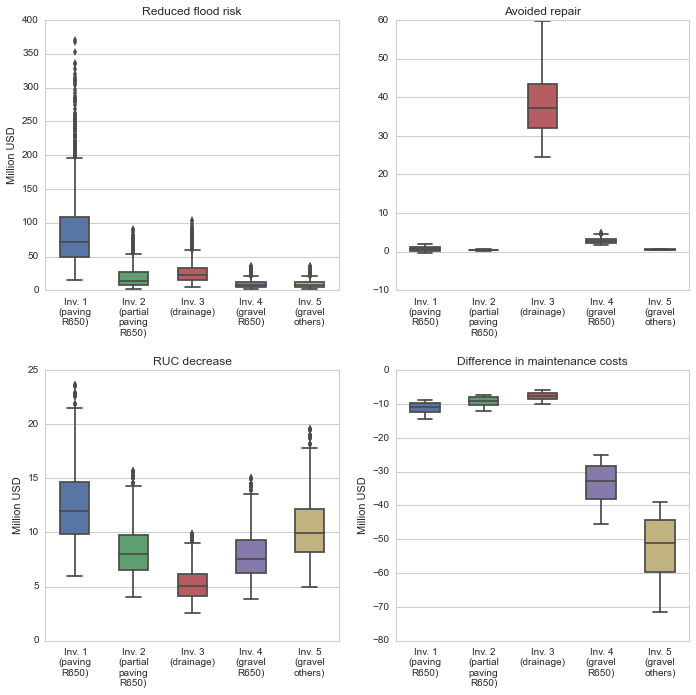

In [176]:
fig = plt.figure(figsize=(10,10))
plt.subplot(221)
sns.boxplot(10**(-6)*reduced_risk.rename(columns=new_names2),width=0.5)
plt.ylabel("Million USD")
plt.title("Reduced flood risk")
plt.subplot(222)
sns.boxplot(10**(-6)*avoided_repair.rename(columns=new_names2),width=0.5)
plt.title("Avoided repair")
plt.subplot(223)
sns.boxplot(10**(-6)*ruc_decrease.rename(columns=new_names2),width=0.5)
plt.title("RUC decrease")
plt.ylabel("Million USD")
plt.subplot(224)
sns.boxplot(10**(-6)*maintenance_sav.rename(columns=new_names2),width=0.5)
plt.ylabel("Million USD")
plt.title("Difference in maintenance costs")

savefig("boxplot_benefit_break_down")

In [14]:
def anova_table(varin,data,experiments_cols):
    formula = varin+" ~ " + "+".join(experiments_cols)
    olsmodel=ols(formula,data=data).fit()
    table=anova_lm(olsmodel)
    table['sum_sq_pc']=table['sum_sq']/table['sum_sq'].sum()
    table=table.sort(['sum_sq'],ascending=False)
    return table['sum_sq_pc']

In [15]:
reduced_risk.columns

Index(['Paving link#1', 'Paving link#2', 'Improve drainange all',
       'Gravel link #1 and #2', 'Gravel alternatives routes'],
      dtype='object')

In [16]:
anova_reduced_risk=pd.DataFrame(index=reduced_risk.rename(columns=new_names).columns,columns=inputs.columns)
for i in reduced_risk.rename(columns=new_names).columns:
    anova_reduced_risk.loc[i,:]=anova_table(i,pd.concat([inputs,reduced_risk],axis=1).rename(columns=new_names),inputs.columns)

In [17]:
anova_reduced_risk

,Repair_time,Discount_Rate,Traffic_growth,Flood_duration,Agriculture_elas,Climate_change_scenario
Pave1,0.2595982,0.07209066,0.07144164,9.948446e-08,0.06551166,0.02025008
Pave2,0.1653659,0.04648802,0.04611234,4.956587e-06,0.04220354,0.009760912
drainage,0.3069104,0.08461585,0.08407459,3.599874e-06,0.07701052,0.003853732
gravel12,0.2754758,0.07557936,0.07506779,1.101484e-05,0.06874646,0.03596431
gravelothers,0.2754758,0.07557936,0.07506779,1.101484e-05,0.06874646,0.03596431


In [18]:
anova_avoided_repair=pd.DataFrame(index=avoided_repair.rename(columns=new_names).columns,columns=inputs.columns)
for i in avoided_repair.rename(columns=new_names).columns:
    anova_avoided_repair.loc[i,:]=anova_table(i,pd.concat([inputs,avoided_repair],axis=1).rename(columns=new_names),inputs.columns)

In [19]:
anova_avoided_repair

,Repair_time,Discount_Rate,Traffic_growth,Flood_duration,Agriculture_elas,Climate_change_scenario
Pave1,0.0002849595,0.03416276,1.682082e-06,1.831327e-07,2.057187e-07,0.8687354
Pave2,0.00462004,0.5534715,3.036754e-05,1.661704e-06,1.717785e-06,0.3799083
drainage,0.005835847,0.7002182,3.566097e-05,2.018074e-06,1.680193e-06,0.2688041
gravel12,0.004728201,0.565494,3.023624e-05,1.562202e-06,2.292148e-06,0.3281277
gravelothers,0.007534269,0.9028689,4.93857e-05,3.357921e-06,2.551058e-06,0.05362497


In [20]:
anova_ruc_decrease=pd.DataFrame(index=ruc_decrease.rename(columns=new_names).columns,columns=inputs.columns)
for i in ruc_decrease.rename(columns=new_names).columns:
    anova_ruc_decrease.loc[i,:]=anova_table(i,pd.concat([inputs,ruc_decrease],axis=1).rename(columns=new_names),inputs.columns)

In [21]:
anova_ruc_decrease

,Repair_time,Discount_Rate,Traffic_growth,Flood_duration,Agriculture_elas,Climate_change_scenario
Pave1,0.01667116,0.3315616,0.3063115,0.0001659436,0.2958784,5.289803e-29
Pave2,0.01682765,0.3314216,0.3061609,0.0001596272,0.2963046,3.281707e-29
drainage,0.01671602,0.3317449,0.3060838,0.0001702071,0.2959278,4.227999e-29
gravel12,0.01663641,0.3317123,0.3061233,0.0001605565,0.295952,5.018263e-29
gravelothers,0.01665225,0.3314177,0.3060025,0.0001642856,0.2963592,5.344301e-29


In [22]:
anova_total=pd.DataFrame(index=benef.rename(columns=new_names).columns,columns=inputs.columns)
for i in benef.rename(columns=new_names).columns:
    anova_total.loc[i,:]=anova_table(i,pd.concat([inputs,benef],axis=1).rename(columns=new_names),inputs.columns)

In [23]:
anova_total

,Repair_time,Discount_Rate,Traffic_growth,Flood_duration,Agriculture_elas,Climate_change_scenario
Pave1,0.246706,0.104199,0.0841101,1.39575e-06,0.07752316,0.01557855
Pave2,0.1532323,0.1315135,0.07468917,1.376261e-09,0.06929325,0.00728432
drainage,0.1987051,0.3954429,0.06412344,8.70555e-06,0.05829384,0.05941393
gravel12,0.1097751,0.6374397,0.0614697,2.712226e-05,0.05617336,0.0156314
gravelothers,0.08068118,0.7339535,0.04940128,2.536529e-05,0.04514216,0.004993347


In [130]:
cost.name="cost"
reduced_risk.name="reduced_risk"
avoided_repair.name="avoided_repair"
ruc_decrease.name="ruc_decrease"
benef.name="benef"
isolated_trips.name="isolated_trips"
maintenance_sav.name='maintenance_sav'

In [131]:
a = cost.unstack()
b = benef.unstack()
c = isolated_trips.unstack()

In [132]:
a.index.names = ["intervention","scenario"]
b.index.names = ["intervention","scenario"]
c.index.names = ["intervention","scenario"]

In [133]:
a.index.difference(b.index)

MultiIndex(levels=[[], []],
           labels=[[], []],
           names=['intervention', 'scenario'])

In [134]:
m = pd.concat([pd.DataFrame(a,columns=["cost"]),pd.DataFrame(b,columns=["benefits"]),pd.DataFrame(c,columns=["isolated_trips"])],axis=1)

In [135]:
inputs.index.name="scenario"

In [136]:
m = m.reset_index().merge(inputs.reset_index()).set_index(["intervention","scenario"])

In [137]:
m.columns

Index(['cost', 'benefits', 'isolated_trips', 'Repair_time', 'Discount_Rate',
       'Traffic_growth', 'Flood_duration', 'Agriculture_elas',
       'Climate_change_scenario'],
      dtype='object')

In [138]:
m['npv']=m.benefits-m.cost
m['saved_trip_per_dollar'] = m.isolated_trips/m.cost
m['benefit_cost_ratio'] = m.benefits/m.cost

In [139]:
df3 = pd.DataFrame()

for i in ['Gravel alternatives routes', 'Gravel link #1 and #2', 'Improve drainange all', 'Paving link#1', 'Paving link#2']:

    formula="npv ~ Repair_time + Discount_Rate + Traffic_growth + Flood_duration + Agriculture_elas + Climate_change_scenario"
    olsmodel=ols(formula,data=m.loc[i]).fit()
    table=anova_lm(olsmodel)
    df3[i]=table['sum_sq']/table['sum_sq'].sum()
    
df3

,Gravel alternatives routes,Gravel link #1 and #2,Improve drainange all,Paving link#1,Paving link#2
Repair_time,0.008953,0.041160,0.235569,2.538993e-01,1.571972e-01
Discount_Rate,0.850140,0.673241,0.248793,5.617062e-02,9.153704e-03
Traffic_growth,0.032770,0.064827,0.081439,8.914388e-02,8.626631e-02
Flood_duration,0.000002,0.000006,0.000009,9.796894e-07,3.956034e-07
Agriculture_elas,0.033004,0.063964,0.074641,8.247661e-02,8.078577e-02
Climate_change_scenario,0.003779,0.018125,0.076254,1.659264e-02,8.529035e-03
Residual,0.071352,0.138676,0.283293,5.017160e-01,6.580676e-01


In [140]:
df = pd.DataFrame()

for i in ['Gravel alternatives routes', 'Gravel link #1 and #2', 'Improve drainange all', 'Paving link#1', 'Paving link#2']:

    formula="benefits ~ Repair_time + Discount_Rate + Traffic_growth + Flood_duration + Agriculture_elas + Climate_change_scenario"
    olsmodel=ols(formula,data=m.loc[i]).fit()
    table=anova_lm(olsmodel)
    df[i]=table['sum_sq']/table['sum_sq'].sum()

In [141]:
df

,Gravel alternatives routes,Gravel link #1 and #2,Improve drainange all,Paving link#1,Paving link#2
Repair_time,0.079812,0.166625,0.220204,0.251476,1.584800e-01
Discount_Rate,0.444462,0.134493,0.311731,0.073768,4.417261e-02
Traffic_growth,0.126206,0.169403,0.073957,0.087288,8.285034e-02
Flood_duration,0.000021,0.000031,0.000009,0.000001,1.462170e-07
Agriculture_elas,0.122859,0.162835,0.067536,0.080642,7.729845e-02
Climate_change_scenario,0.013905,0.045743,0.068944,0.016215,8.146065e-03
Residual,0.212735,0.320871,0.257619,0.490610,6.290524e-01


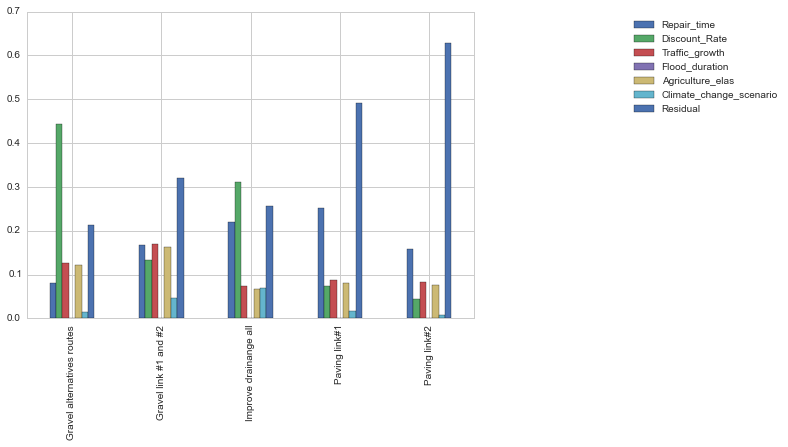

In [142]:
ax=df.T.plot(kind='bar')
ax.legend(bbox_to_anchor=(1.7, 1.))

In [143]:
df2 = pd.DataFrame()

for i in ['Gravel alternatives routes', 'Gravel link #1 and #2', 'Improve drainange all', 'Paving link#1', 'Paving link#2']:

    formula="cost ~ Repair_time + Discount_Rate + Traffic_growth + Flood_duration + Agriculture_elas + Climate_change_scenario"
    olsmodel=ols(formula,data=m.loc[i]).fit()
    table=anova_lm(olsmodel)
    df2[i]=table['sum_sq']/table['sum_sq'].sum()

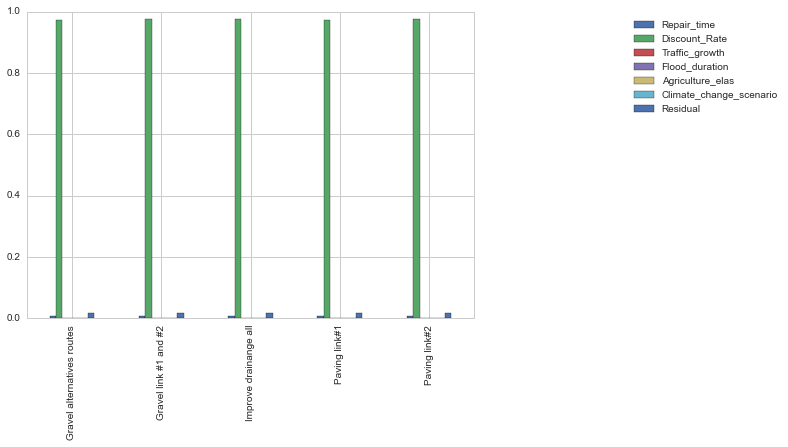

In [144]:
ax=df2.T.plot(kind='bar')
ax.legend(bbox_to_anchor=(1.7, 1.))

In [145]:
m.unstack('intervention').swaplevel(i=1,j=0,axis=1).sample(10)

intervention,Gravel alternatives routes,Gravel link #1 and #2,Improve drainange all,Paving link#1,Paving link#2,Gravel alternatives routes,Gravel link #1 and #2,Improve drainange all,Paving link#1,Paving link#2,...,Gravel alternatives routes,Gravel link #1 and #2,Improve drainange all,Paving link#1,Paving link#2,Gravel alternatives routes,Gravel link #1 and #2,Improve drainange all,Paving link#1,Paving link#2
,cost,cost,cost,cost,cost,benefits,benefits,benefits,benefits,benefits,...,saved_trip_per_dollar,saved_trip_per_dollar,saved_trip_per_dollar,saved_trip_per_dollar,saved_trip_per_dollar,benefit_cost_ratio,benefit_cost_ratio,benefit_cost_ratio,benefit_cost_ratio,benefit_cost_ratio
scenario,,,,,,,,,,,,,,,,,,,,,
1337,70800000,46600000,33000000,43700000,27600000,-23779000,-5830000,81740000,167750000,39298000,...,0.001737,0.002639,0.018333,0.044165,-0.000092,-0.335862,-0.125107,2.476970,3.838673,1.423841
797,81400000,53500000,34800000,46100000,29700000,-37003000,-16180000,59230000,73610000,10217000,...,0.002039,0.003103,0.013793,0.032538,0.004983,-0.454582,-0.302430,1.702011,1.596746,0.344007
1293,83300000,54700000,35100000,46500000,30000000,-47256000,-23680000,63320000,74801000,14069000,...,0.001321,0.002011,0.015328,0.036774,-0.000110,-0.567299,-0.432907,1.803989,1.608624,0.468967
1581,60900000,40200000,31300000,41600000,25800000,-23832000,-9020000,49190000,58435000,7445000,...,0.002315,0.003507,0.021150,0.064423,0.005426,-0.391330,-0.224378,1.571565,1.404688,0.288566
1771,65800000,43300000,32200000,42700000,26700000,-31410000,-14550000,45950000,35840000,3781000,...,0.001468,0.002231,0.014037,0.042857,0.003575,-0.477356,-0.336028,1.427019,0.839344,0.141610
1537,64400000,42400000,31900000,42400000,26400000,-23722000,-8070000,55040000,68037000,9904000,...,0.002081,0.003160,0.019624,0.059670,0.005000,-0.368354,-0.190330,1.725392,1.604646,0.375152
1419,67200000,44300000,32400000,43000000,27000000,-29511000,-13010000,54060000,76913000,17755000,...,0.000770,0.001167,0.007809,0.018744,-0.000069,-0.439152,-0.293679,1.668519,1.788674,0.657593
1174,66700000,43900000,32300000,42900000,26900000,-28225000,-12120000,54110000,78097000,18342000,...,0.000708,0.001075,0.007152,0.017156,-0.000060,-0.423163,-0.276082,1.675232,1.820443,0.681859


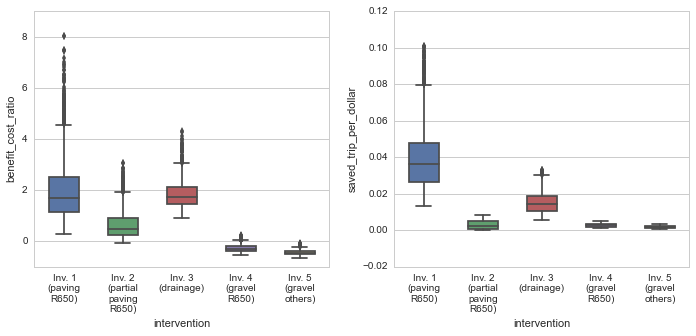

In [177]:
ax=plt.figure(figsize=(10,5))
plt.subplot(121)
ax=sns.boxplot(x='intervention',y='benefit_cost_ratio',data=m.rename(index=new_names2).reset_index(),width=0.5)
plt.subplot(122)
ax=sns.boxplot(x='intervention',y='saved_trip_per_dollar',data=m.rename(index=new_names2).reset_index(),width=0.5)

savefig("cba_results")

In [147]:
cc = dict({0:"CC decreases\nprecipitations",1:"Current\nclimate", 3:"Medium\nincrease in\nprecipitations", 4:"High increase\nin precipiations"})

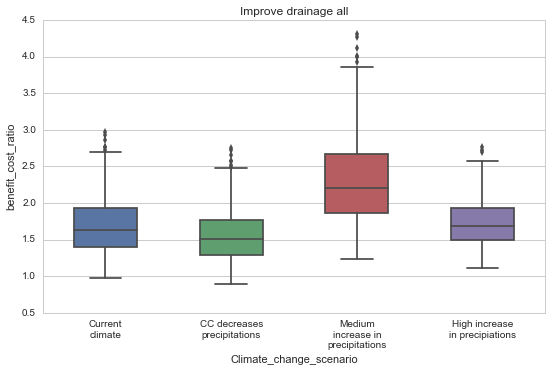

In [148]:
sub=m.rename(index=new_names).reset_index()
sub.Climate_change_scenario.replace(cc,inplace=True)
sns.boxplot(x='Climate_change_scenario',y='benefit_cost_ratio',data=sub[sub.intervention=='drainage'],width=0.5)
plt.title("Improve drainage all")
savefig("benefit_cost_ratio_drainage")

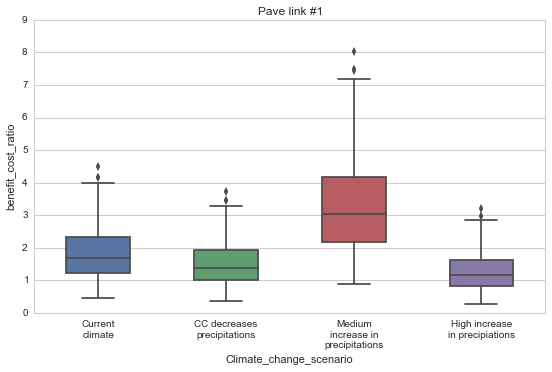

In [149]:
sub=m.rename(index=new_names).reset_index()
sub.Climate_change_scenario.replace(cc,inplace=True)
sns.boxplot(x='Climate_change_scenario',y='benefit_cost_ratio',data=sub[sub.intervention=='Pave1'],width=0.5)
plt.title("Pave link #1")
savefig("benefit_cost_ratio_pave_1")

In [49]:
import prim

In [150]:
forprim=m.unstack('intervention').swaplevel(i=1,j=0,axis=1).rename(columns=new_names)

In [214]:
sum(scenarofinterest.npv>0)/2000

0.81100000000000005

In [220]:
forprim.columns

MultiIndex(levels=[['Pave1', 'Pave2', 'drainage', 'gravel12', 'gravelothers'], ['Agriculture_elas', 'Climate_change_scenario', 'Discount_Rate', 'Flood_duration', 'Repair_time', 'Traffic_growth', 'benefit_cost_ratio', 'benefits', 'cost', 'isolated_trips', 'npv', 'saved_trip_per_dollar']],
           labels=[[4, 3, 2, 0, 1, 4, 3, 2, 0, 1, 4, 3, 2, 0, 1, 4, 3, 2, 0, 1, 4, 3, 2, 0, 1, 4, 3, 2, 0, 1, 4, 3, 2, 0, 1, 4, 3, 2, 0, 1, 4, 3, 2, 0, 1, 4, 3, 2, 0, 1, 4, 3, 2, 0, 1, 4, 3, 2, 0, 1], [8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 9, 9, 9, 9, 9, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 6, 6, 6, 6, 6]],
           names=['intervention', None])

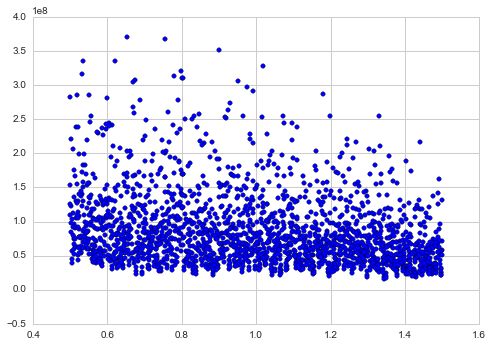

In [227]:
plt.scatter(inputs['Agriculture_elas'],reduced_risk['Paving link#1'])

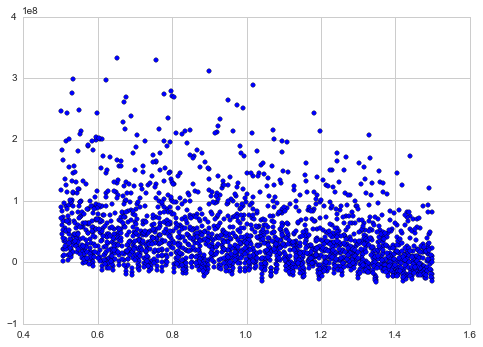

In [226]:
plt.scatter(scenarofinterest.Agriculture_elas,scenarofinterest.npv)

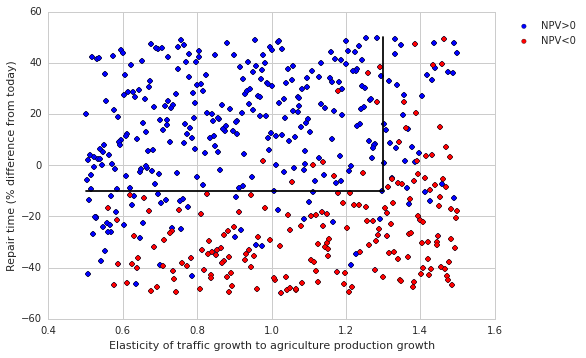

In [250]:
scenarofinterest = forprim.Pave1
select = scenarofinterest.npv>0
plt.scatter(scenarofinterest[select].Agriculture_elas,100*scenarofinterest[select].Repair_time,c='b',label="NPV>0")
plt.scatter(scenarofinterest[~select].Agriculture_elas,100*scenarofinterest[~select].Repair_time,c='r',label="NPV<0")
plt.legend(bbox_to_anchor=(1.2,1))
plt.plot([0.5,1.3],[-10,-10],color='black')
plt.plot([1.3,1.3],[-10,50],color='black')
plt.xlabel("Elasticity of traffic growth to agriculture production growth")
plt.ylabel("Repair time (% difference from today)")
plt.savefig(figfolder+"scenario-discovery.png",bbox_inches='tight')

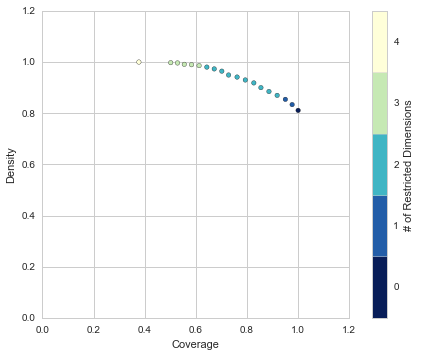

In [229]:
scenarofinterest = forprim.Pave1
p = prim.Prim(scenarofinterest[inputs.columns], scenarofinterest.npv>0, threshold=0.5, threshold_type=">")

box = p.find_box()
box.show_tradeoff()

plt.show()

In [237]:
box.select(12)
print(box)

Box 1 [Peeling Trajectory 12]
    Stats
        Coverage: 0.643033
        Density:  0.980263
        Mass:     0.532000
        Res Dim:  2.000000
        Mean:     0.980263
    Limits
                               min       max     qp values
        Repair_time      -0.147951  0.498351  4.213949e-44
        Agriculture_elas  0.500446  1.305099  4.964907e-09


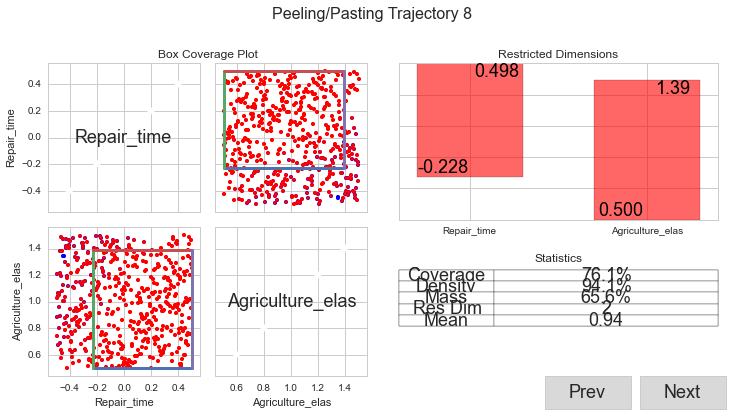

In [216]:
box.show_details();

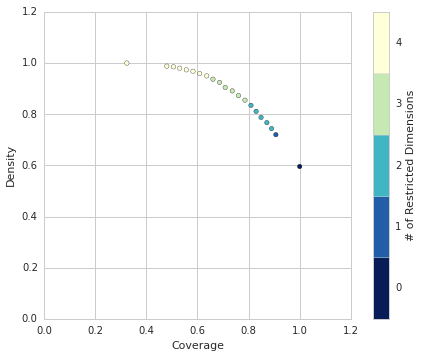

In [251]:
scenarofinterest = forprim.Pave1
p = prim.Prim(scenarofinterest[inputs.columns], forprim.Pave1.npv>forprim.drainage.npv, threshold=0.5, threshold_type=">")

box = p.find_box()
box.show_tradeoff()

plt.show()

In [252]:
box.select(10)
print(box)

Box 1 [Peeling Trajectory 10]
    Stats
        Coverage: 0.708648
        Density:  0.904609
        Mass:     0.466500
        Res Dim:  3.000000
        Mean:     0.904609
    Limits
                                      min       max     qp values
        Repair_time             -0.192041  0.498351  1.387902e-30
        Climate_change_scenario  0.000000  3.000000  6.706725e-28
        Agriculture_elas         0.500446  1.386053  1.920205e-04


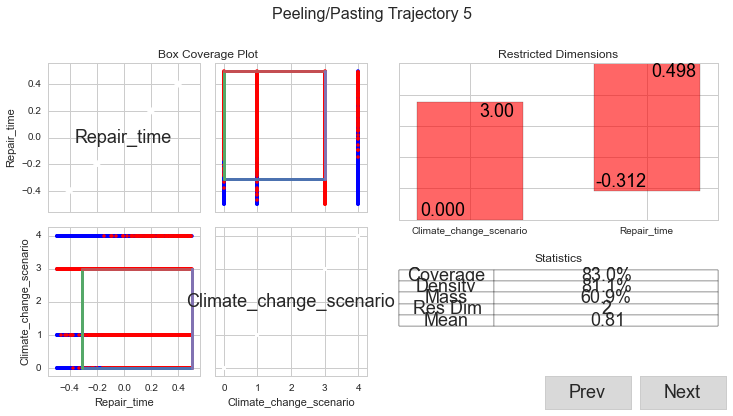

In [158]:
box.show_details();

In [159]:
sum(forprim.Pave1.npv>forprim.drainage.npv)/2000

0.59550000000000003

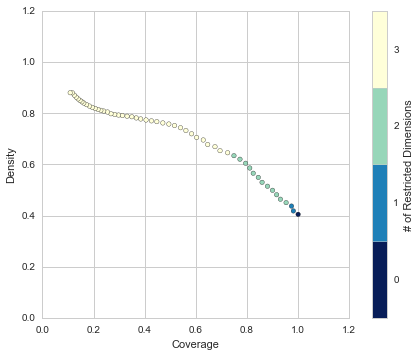

In [160]:
scenarofinterest = forprim.Pave1
p = prim.Prim(scenarofinterest[inputs.columns], forprim.Pave1.npv<forprim.drainage.npv, threshold=0.5, threshold_type=">")

box = p.find_box()
box.show_tradeoff()

plt.show()

In [162]:
box.select(15)
print(box)

Box 1 [Peeling Trajectory 15]
    Stats
        Coverage: 0.724351
        Density:  0.645374
        Mass:     0.454000
        Res Dim:  3.000000
        Mean:     0.645374
    Limits
                               min       max     qp values
        Repair_time      -0.498815  0.039926  9.364393e-39
        Agriculture_elas  0.585804  1.499111  4.106993e-03
        Traffic_growth    0.000080  0.057402  2.475668e-01


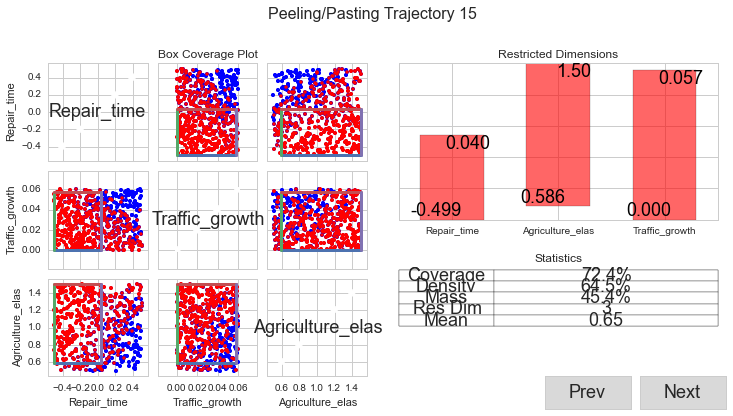

In [163]:
box.show_details();

In [181]:
regret = m.npv.unstack('intervention').copy()
regret = regret.rename(columns=new_names2).sort(axis=1)

In [183]:
regret.add(-regret.max(axis=1),axis=0).min()

intervention
Inv. 1\n(paving\nR650)             -51709000
Inv. 2\n(partial\npaving\nR650)   -269682000
Inv. 3\n(drainage)                -214733000
Inv. 4\n(gravel\nR650)            -379143000
Inv. 5\n(gravel\nothers)          -431905000
dtype: float64

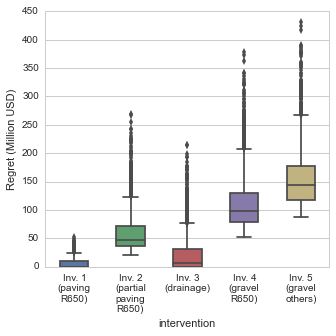

In [224]:
fig = plt.figure(figsize=(5,5))
sns.boxplot(-10**(-6)*regret.add(-regret.max(axis=1),axis=0),width=0.5)
plt.ylabel("Regret (Million USD)")
savefig("regret")

In [186]:
r = regret.add(-regret.max(axis=1),axis=0)

In [195]:
rr=r==0

In [197]:
rr.sum(axis=0)

intervention
Inv. 1\n(paving\nR650)             1191
Inv. 2\n(partial\npaving\nR650)       0
Inv. 3\n(drainage)                  809
Inv. 4\n(gravel\nR650)                0
Inv. 5\n(gravel\nothers)              0
dtype: int64

In [199]:
rr.sum(axis=0)/len(rr)

intervention
Inv. 1\n(paving\nR650)             0.5955
Inv. 2\n(partial\npaving\nR650)    0.0000
Inv. 3\n(drainage)                 0.4045
Inv. 4\n(gravel\nR650)             0.0000
Inv. 5\n(gravel\nothers)           0.0000
dtype: float64